<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220315_SVM_2D_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D 그래프(scatter)

### Poly 커널을 적용하여 2차원 → 3차원 그래프 변환

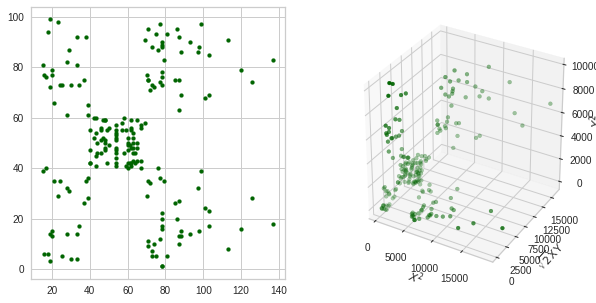

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
# SVM에서 다항식 커널("poly")을 적용하여 (x, y) 2차원 → (x, y, z)3차원으로 변형하는 과정
x = df['Annual Income (k$)'] ** 2
y = math.sqrt(2) * df['Annual Income (k$)'] * df['Spending Score (1-100)']
z = df['Spending Score (1-100)'] ** 2

fig = plt.figure(figsize=(10, 5))

# 2차원 그래프
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='o', s=15, c='darkgreen')

# SVM알고리즘, poly커널(2차원 → 3차원)을 적용한 3차원 그래프
# 3D axes를 만들기 위해 projection='3d' 키워드를 입력해줍니다.
# 3D axes만을 위해 만들어진 별도의 축에서 scatter() 및 set_xlabel() 등의 작업 수행
ax2 = fig.add_subplot(1,2,2, projection='3d') # gca() : 현재 fig의 ax 객체를 반환
ax2.scatter(x,y,z, marker='o', s=15, c='darkgreen') # s = 점의 크기, c = 점의 색깔
ax2.set_xlabel(r"$X^2$") # matplotlib에서 수학적 표현 사용
ax2.set_ylabel(r"$\sqrt{2}$XY")
ax2.set_zlabel(r"$Y^2$")

plt.show()

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 데이터(x, y) 및 레이블이 주어진 3차원 그래프

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


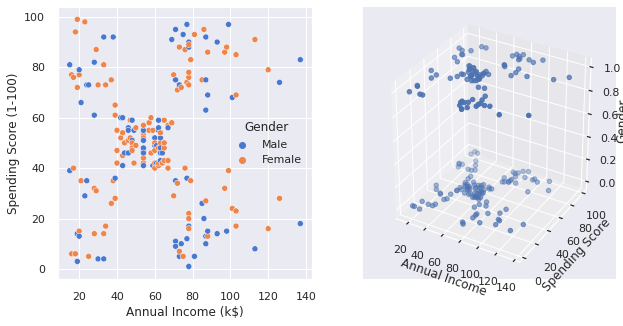

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

# LabelEncoder 객체 생성 후  fit( )과 transform( ) 적용
encoder = LabelEncoder()
encoder.fit(df['Gender'])
labels = encoder.transform(df['Gender'])
df['Gender_encoded'] = labels

# SVM에서 "linear"커널 적용하여 (x, y) 2차원 → (x, y, z) 3차원으로 변형하는 과정
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
z = df['Gender_encoded']

fig = plt.figure(figsize=(10, 5))
# 3차원 축을 만들기위해 별도의 축을 만들어 줘야 하므로 for 문을 통한 subplot() 적용은 적절하지 않다.

# 2차원 그래프(with seaborn)
ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'],  hue=df['Gender'], palette='muted', ax=ax1)

# SVM알고리즘, poly커널(2차원 → 3차원)을 적용한 3차원 그래프
# 3D axes를 만들기 위해 projection='3d' 키워드를 입력해줍니다.
# 3D axes만을 위해 만들어진 별도의 축에서 scatter() 및 set_xlabel() 등의 작업 수행
ax2 = fig.add_subplot(1,2,2, projection='3d') # gca() : 현재 fig의 ax 객체를 반환
ax2.scatter(x, y, z)
# sns.scatterplot(x,y,z, ax=ax2) # sns.scatterplot() 3차원 활용시 hue 파라미터 적용 불가
ax2.set_xlabel("Annual Income")
ax2.set_ylabel("Spending Score")
ax2.set_zlabel("Gender")

plt.show()

### 2차원 그래프에 결정경계 나타내기

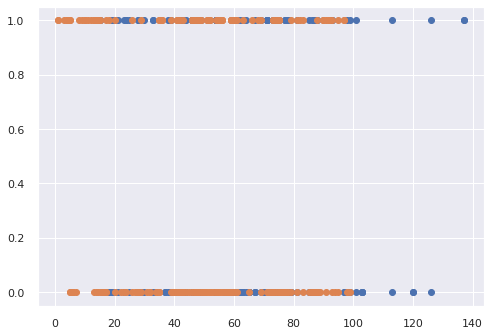

In [86]:
plt.scatter(x, z)
plt.scatter(y, z)
plt.show()

### 3차원 그래프에 결정경계면 나타내기

In [79]:
X_new = np.array(df[['Annual Income (k$)', 'Spending Score (1-100)']])
X_new[:5, :]
# X_new.shape # (200, 2)
# X_new[:, 0] # 15

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [82]:
from sklearn.svm import LinearSVC

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [83]:
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
# grid의 축값 조정
XX, YY = np.meshgrid(xx,yy)

ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ValueError: ignored

In [ ]:
xx

https://data-gardner.tistory.com/31